In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score

In [0]:
#--------------------Run this cell to mount your Google Drive-------------------
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Reading the file from Google Drive

data = pd.read_csv("/content/drive/My Drive/ER/KNN/glass.csv", sep = ',')
#data.rename(columns = {"animal name":"animal_name"}, inplace = True)
#data_x = data.drop(labels = ["type"], axis = 1)
#data_y = data["type"]

In [0]:
sns.set_style(style = "darkgrid")

In [0]:
  data.head(50)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1


In [0]:
data["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

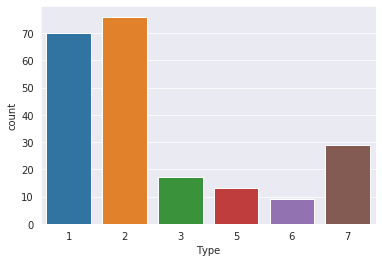

In [0]:
sns.countplot(data = data, x = "Type")

#Observation:

*   There is no "Type" with label 4.
*   Label 1 and 2 are predominantly greater than anyother label.




In [0]:
data.shape

(214, 10)

In [0]:
'''
#Reshuffling the data set.

data = data.sample(frac = 1, random_state = 42).reset_index(drop = True)
#data.drop(labels = "index", inplace = True, axis = 1)
'''

'\n#Reshuffling the data set.\n\ndata = data.sample(frac = 1, random_state = 42).reset_index(drop = True)\n#data.drop(labels = "index", inplace = True, axis = 1)\n'

In [0]:
#Separating Labels with the dataset.

y = data["Type"]
data.drop(labels = "Type", inplace = True, axis = 1)

In [0]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [0]:
#Scaling the data
ss = StandardScaler()
data = pd.DataFrame(ss.fit_transform(data), columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'])

In [0]:
data.head(50)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
5,-0.793931,-0.758384,0.643117,0.351521,0.412905,0.219689,-0.624699,-0.352877,2.088150
6,-0.308744,-0.132382,0.636168,-0.612137,0.568197,0.127475,-0.554268,-0.352877,-0.586451
7,-0.265836,-0.316500,0.643117,-0.792823,0.762313,0.112107,-0.504966,-0.352877,-0.586451
8,0.268859,0.775936,0.622270,-0.150384,-0.738850,0.096738,-0.462707,-0.352877,-0.586451
9,-0.269137,-0.500618,0.636168,-0.170460,0.438787,0.112107,-0.392276,-0.352877,0.545111


In [0]:
#Train test split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.3, random_state = 42)

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(149, 9)
(149,)
(65, 9)
(65,)


In [0]:
data.shape

(214, 9)

In [0]:
def upsampling(X, Y):
  X_concat = pd.concat([X,Y], axis = 1)
  length = len(X_concat[X_concat["Type"] == 2])

  label_1 = X_concat[X_concat["Type"] == 1]
  label_3 = X_concat[X_concat["Type"] == 3]
  label_5 = X_concat[X_concat["Type"] == 5]
  label_6 = X_concat[X_concat["Type"] == 6]
  label_7 = X_concat[X_concat["Type"] == 7]

  #Upsampling
  resampled_data_1 = label_1.sample(length, replace = True, random_state = 42)
  resampled_data_3 = label_3.sample(length, replace = True, random_state = 42)
  resampled_data_5 = label_5.sample(length, replace = True, random_state = 42)
  resampled_data_6 = label_6.sample(length, replace = True, random_state = 42)
  resampled_data_7 = label_7.sample(length, replace = True, random_state = 42)
  
  X_concat = pd.concat([X_concat[X_concat["Type"] == 2], resampled_data_1, resampled_data_3, 
                    resampled_data_5, resampled_data_6, resampled_data_7])
  
  
  Y = X_concat["Type"]
  X = X_concat.drop(labels = "Type", axis = 1)
  
  return X, Y

In [0]:
X_train, y_train = upsampling(X_train, y_train)
X_test, y_test = upsampling(X_test, y_test)

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(318, 9)
(318,)
(138, 9)
(138,)


In [0]:
knn = KNeighborsClassifier(algorithm = "auto")
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred = knn.predict(X_test)

In [0]:
cm = confusion_matrix(y_test, y_pred)

In [0]:
cm

array([[15,  2,  6,  0,  0,  0],
       [ 8, 11,  2,  1,  1,  0],
       [ 0, 11, 12,  0,  0,  0],
       [ 0,  0,  0, 23,  0,  0],
       [ 0,  0,  0,  0, 23,  0],
       [ 0,  0,  0,  0,  2, 21]])

In [40]:
print("Precision score:", precision_score(y_test, y_pred, average = "macro"))

Precision score: 0.7589093273875882


In [41]:
print("Recall Score: ", recall_score(y_test, y_pred, average = "macro"))

Recall Score:  0.7608695652173912
